EXPLANATION OF OUTPUT VARIABLES (the relevant trials are the "canvas-keyboard-response" ones):

Experiment flow:
- *block_index* -> index of the block (NB: starts from zero)
- *presentation_index* -> index of the presentation inside one block (NB: starts from zero)

Experiment parameters:
- *clique_size* -> size of the clique in one of the two displayed graphs
- *graphs_size* -> size of the displayed graphs 
- *graphs_couple* -> couple of graphs shown in current trial
- *nodes_order* -> order of the nodes in current trial

Dependent variables:
- *rt* -> response time in ms (collected automatically)
- *response* -> in this experiment, the accepted keys are " "; "arrowright" or "arrowleft"
- *accuracy* -> this variable is manually computed and added only to the trials where response was arrowright or arrowleft

Comparison variables:
- *correct_response* -> correct response for current trial

Produced automatically / not relevant:

For all trials:
- *trial_type* -> the name of the plugin used to run the trial (the real trials of the experiment are "canvas-keyboard-response")
- *trial_index* -> the index of the current trial across the whole experiment (it is a global counter of trials, it also includes instructions and tutorial ones)
- *time_elapsed* -> the number of milliseconds between the start of the experiment and when the trial ended
- *internal_node_id* -> string identifier for the current TimelineNode

For preload plugin:
- *success*	-> if true, then all files loaded successfully within the max_load_time. If false, then one or more file requests returned a failure and/or the file loading did not complete within the max_load_time duration.
- *timeout* -> 	if true, then the files did not finish loading within the max_load_time duration. If false, then the file loading did not timeout.
- *failed_images* -> one or more image file paths that produced a loading failure before the trial ended.
- *failed_audio* -> one or more audio file paths that produced a loading failure before the trial ended.
- *failed_video* -> one or more video file paths that produced a loading failure before the trial ended.

For instructions plugin:
- *rt* -> the response time (in ms) for the subject to view all of the pages
- *view_history* -> array containing the order of pages the subject viewed (collected only for "instructions" plugin)

For image-keyboard-response plugin:
- *stimulus* -> the path of the image that was displayed.



------------------------------------------------------------------------------------------------------------

Importing packages:

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

Importing and "cleaning" a single json file:

In [4]:
file1Path = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP/data_analysis/json/data/debugging/HUPLACLIP_pilot1_14.4.2023_17.1.2.json')
df1 = pd.read_json(file1Path)
print(df1.shape)
print(df1.info())

(371, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   view_history        8 non-null      object 
 1   rt                  368 non-null    float64
 2   trial_type          371 non-null    object 
 3   trial_index         371 non-null    int64  
 4   time_elapsed        371 non-null    int64  
 5   internal_node_id    371 non-null    object 
 6   success             3 non-null      float64
 7   timeout             3 non-null      float64
 8   failed_images       3 non-null      object 
 9   failed_audio        3 non-null      object 
 10  failed_video        3 non-null      object 
 11  stimulus            39 non-null     object 
 12  response            360 non-null    object 
 13  nodes_order         321 non-null    object 
 14  correct_response    321 non-null    object 
 15  block_index         321 non-null    float64
 16

In [5]:
# isolating experiment trials ("canvas-keyboard-response" ones)
df1_experiment = df1[df1.trial_type == "canvas-keyboard-response"]
df1_experiment.head()
print(df1_experiment.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 46 to 369
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   view_history        0 non-null      object 
 1   rt                  321 non-null    float64
 2   trial_type          321 non-null    object 
 3   trial_index         321 non-null    int64  
 4   time_elapsed        321 non-null    int64  
 5   internal_node_id    321 non-null    object 
 6   success             0 non-null      float64
 7   timeout             0 non-null      float64
 8   failed_images       0 non-null      object 
 9   failed_audio        0 non-null      object 
 10  failed_video        0 non-null      object 
 11  stimulus            0 non-null      object 
 12  response            321 non-null    object 
 13  nodes_order         321 non-null    object 
 14  correct_response    321 non-null    object 
 15  block_index         321 non-null    float64
 16  present

In [6]:
# dropping empty/irrelevant variables:
df1_cleaned = df1_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1)
print(df1_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 46 to 369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rt                  321 non-null    float64
 1   trial_type          321 non-null    object 
 2   response            321 non-null    object 
 3   nodes_order         321 non-null    object 
 4   correct_response    321 non-null    object 
 5   block_index         321 non-null    float64
 6   presentation_index  321 non-null    float64
 7   clique_size         321 non-null    float64
 8   graph_size          321 non-null    float64
 9   graphs_couple       120 non-null    object 
 10  accuracy            120 non-null    float64
dtypes: float64(6), object(5)
memory usage: 30.1+ KB
None


In [7]:
# visualizing the data
df1_cleaned.tail()

,rt,trial_type,response,nodes_order,correct_response,block_index,presentation_index,clique_size,graph_size,graphs_couple,accuracy
365,588.0,canvas-keyboard-response,arrowright,"[153, 168, 8, 15, 251, 205, 2, 62, 100, 156, 1...",arrowleft,3.0,28.0,12.0,300.0,"[{'1': [0], '2': [1, 1], '3': [0, 1, 1], '4': ...",0.0
366,720.0,canvas-keyboard-response,,"[215, 249, 5, 55, 150, 21, 116, 265, 119, 191,...",arrowright,3.0,29.0,6.0,300.0,NaN,NaN
367,404.0,canvas-keyboard-response,,"[75, 245, 18, 261, 95, 268, 171, 257, 227, 31,...",arrowright,3.0,29.0,6.0,300.0,NaN,NaN
368,431.0,canvas-keyboard-response,,"[115, 30, 63, 149, 164, 7, 96, 210, 26, 11, 20...",arrowright,3.0,29.0,6.0,300.0,NaN,NaN
369,542.0,canvas-keyboard-response,arrowleft,"[64, 74, 194, 29, 61, 114, 151, 75, 112, 161, ...",arrowright,3.0,29.0,6.0,300.0,"[{'1': [1], '2': [1, 0], '3': [0, 0, 0], '4': ...",0.0


(TO ADAPT FROM NOW ON STARTING FROM THE CODE ABOVE)

Importing all the stored json files, combining them in a single dataframe and removing irrelvant variables:

In [4]:
from pathlib import Path

# creating empty dataframe:
data = pd.DataFrame()
# accessing all json files in 'data' directory:
files = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP/data_analysis/json/data/N300_K200').glob('*.json')
for file in files:
    # reading single csv file as dataframe
    df = pd.read_json(file)
    # adding single dataframe to general dataframe:
    data = pd.concat([data,df])

# checking dimension of data and printing the names of the variables:
print(data.shape)
print(data.columns.tolist())

data.drop(["view_history","internal_node_id", "trial_index", "failed_images", "failed_audio", "failed_video", "timeout", "success", "time_elapsed"], axis=1, inplace=True)

(395, 18)
['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed', 'internal_node_id', 'success', 'timeout', 'failed_images', 'failed_audio', 'failed_video', 'stimulus', 'response', 'nodesOrdering', 'cliqueSize', 'correctResponse', 'presentationNumber', 'correctnessOfResponse']


Isolating trials of real experiment ("canvas-keyboard-response" trials)

In [5]:
data_experiment = data[data.trial_type == "canvas-keyboard-response"]
data_experiment.head()

,rt,trial_type,stimulus,response,nodesOrdering,cliqueSize,correctResponse,presentationNumber,correctnessOfResponse
46,992.0,canvas-keyboard-response,NaN,,"[52, 71, 197, 38, 183, 83, 217, 205, 296, 186,...",200.0,arrowright,0.0,NaN
47,700.0,canvas-keyboard-response,NaN,,"[242, 4, 111, 247, 218, 160, 186, 58, 266, 51,...",200.0,arrowright,0.0,NaN
48,552.0,canvas-keyboard-response,NaN,arrowright,"[33, 178, 50, 69, 35, 262, 42, 173, 144, 60, 2...",200.0,arrowright,0.0,1.0
49,770.0,canvas-keyboard-response,NaN,,"[293, 271, 200, 161, 205, 93, 130, 14, 170, 67...",190.0,arrowright,1.0,NaN
50,456.0,canvas-keyboard-response,NaN,arrowright,"[150, 137, 93, 250, 219, 50, 288, 169, 284, 85...",190.0,arrowright,1.0,1.0


- Accuracy:

0.825
[200. 190. 180. 170. 160. 150. 140. 130. 120. 110. 100.  90.  80.  70.
  60.  50.  40.  30.  20.  10.]


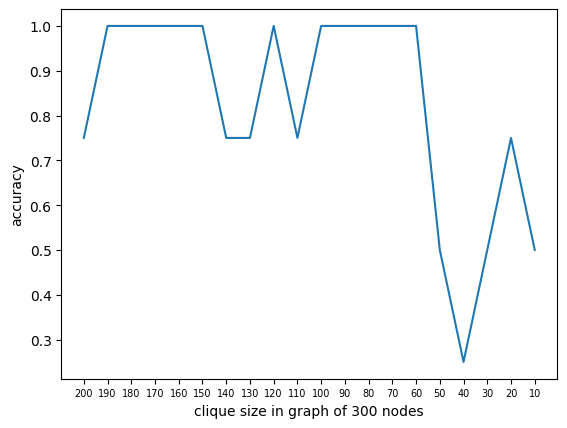

In [6]:
# 1. overall accuracy ( # correct answers / # final answers )
overall_accuracy = sum(data_experiment.correctnessOfResponse == 1) / sum(~ data_experiment.correctnessOfResponse.isna())
print(overall_accuracy)

# 2. calculating accuracy for the levels of "cliqueSize"
# - obtaining levels of "cliqueSize" (this should match with experiment parameters)
print(data_experiment.cliqueSize.unique())
# - calculating accuracy for the different levels of "cliqueSize"
accuracy_dict = dict()
for i in data_experiment.cliqueSize.unique():
    # isolating data of current clique size:
    current_data = data_experiment[data_experiment.cliqueSize == i]
    accuracy_current_cliqueSize = sum(current_data.correctnessOfResponse == 1) / sum(~ current_data.correctnessOfResponse.isna())
    accuracy_dict[str(round(i))] = accuracy_current_cliqueSize
# plotting the results:
x_values = accuracy_dict.keys()
y_values = accuracy_dict.values()
plt.plot(x_values,y_values)
plt.xlabel("clique size in graph of 300 nodes")
plt.ylabel("accuracy")
plt.tick_params(axis='x', which='major', labelsize=7)

- Number of shuffles:

In [7]:
# 1. average number of shuffles
# 2. calculating number of shuffles for the levels of "cliqueSize"  (plotting the results)
# note: if number of shuffles increases as a function of "cliqueSize", it could be helping subjects for difficult instances of the task

- Reaction times:

False    391
True       4
Name: rt, dtype: int64


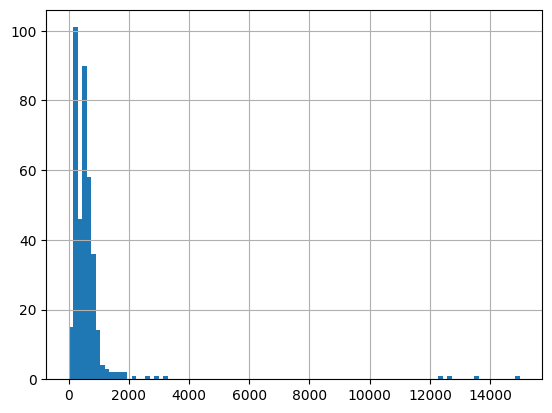

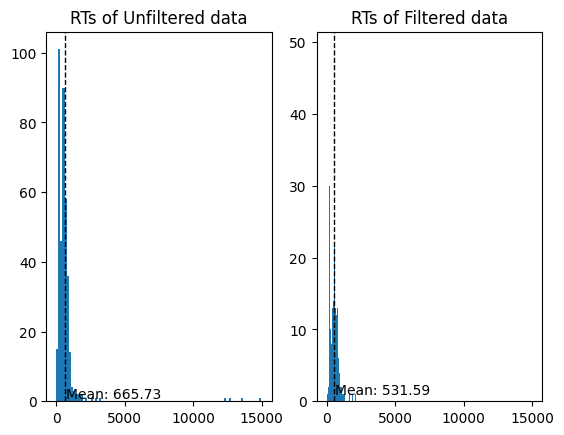

In [8]:
# 1. average RT (for all trials, both final responses and shuffles)
# 2. RT as a function of "cliqueSize"
# note: if reaction time increases as a function of "cliqueSize", it could be an indication of increasing difficulty

###########################################################


# histogram of reaction times distribution (TO REVIEW):
data.rt.hist(bins=100)
# counting trials that were too slow and removing them (exclusion criterion: rt>7500)
print((data.rt>=7500).value_counts())
data_filtered = data.query('rt < 7500')

#plotting unfiltered and filtered data:
fig, (ax1,ax2) = plt.subplots(1, 2,sharex=True)
min_ylim, max_ylim = plt.ylim()
#unfiltered data
ax1.hist(data.rt,bins=100)
ax1.axvline(data.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax1.text(data.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data.rt.mean()))
ax1.set_title("RTs of Unfiltered data")
#filtered data
ax2.hist(data_filtered.rt,bins=100)
ax2.axvline(data_filtered.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax2.text(data_filtered.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data_filtered.rt.mean()))
ax2.set_title("RTs of Filtered data")
plt.show()